# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

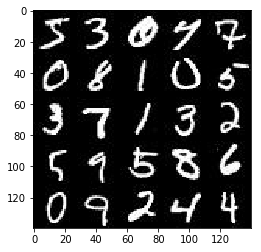

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

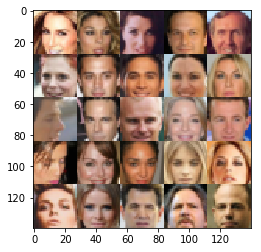

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [31]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real= tf.placeholder(tf.float32,  [None, image_width, image_height, image_channels], name='input_real')
    input_z=tf.placeholder(tf.float32,  [None, z_dim], name='input_z')
    learning_rate = tf.placeholder(tf.float32,shape=(), name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [39]:
def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
  
   
    with tf.variable_scope('discriminator', reuse=reuse):
      
        
        x=tf.layers.conv2d(images,56,5,2,'same')
        x = tf.maximum(alpha * x, x)
            
        x=tf.layers.conv2d(x,112,5,2,'same')
        x=tf.layers.batch_normalization(x,training=True)
        x = tf.maximum(alpha * x, x)
        
        x=tf.layers.conv2d(x,224,5,2,'same')
        x=tf.layers.batch_normalization(x,training=True)
        x = tf.maximum(alpha * x, x)
        
        x=tf.reshape(x,(-1,4*4*224))
        
        logits=tf.layers.dense(x,1)
        logits = tf.layers.dropout(logits, rate=0.5)
        output=tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [42]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
   
   
    with tf.variable_scope('generator',reuse=not(is_train)):
        
        x=tf.layers.dense(z,7*7*112)
        x=tf.reshape(x,(-1,7,7,112))
        x=tf.layers.batch_normalization(x,training=is_train)
        x=tf.maximum(alpha*x,x)
        
        x=tf.layers.conv2d_transpose(x,56,5,2,'same')
        x=tf.layers.batch_normalization(x,training=is_train)
        x=tf.maximum(alpha*x,x)
        
        x = tf.layers.conv2d_transpose(x, out_channel_dim, 5, 2, 'same')
        output = tf.tanh(x)
    
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [54]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    smooth = 0.1
    real_labels = tf.ones_like(d_model_real) * (1 - smooth)
    fake_labels = tf.zeros_like(d_model_fake)
    g_labels    = tf.ones_like(d_model_fake)

    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=real_labels))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=fake_labels))
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=g_labels))

    d_loss = d_real_loss + d_fake_loss
    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [55]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars= [v for v in t_vars if v.name.startswith('discriminator')]
    g_vars = [v for v in t_vars if v.name.startswith('generator')]
    
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt=tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss,var_list=d_vars)
        g_train_opt=tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [56]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [57]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr=model_inputs(data_shape[1],data_shape[2], data_shape[3],z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    show_every = 100
    print_every=10
    steps=0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                
                batch_z= np.random.uniform(-1,1, size=(batch_size,z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % print_every ==0:
                    train_loss_d = d_loss.eval(feed_dict={input_z:batch_z, input_real:batch_images})
                    train_loss_g= g_loss.eval(feed_dict={input_z:batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i +1, epoch_count), 
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                         "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every==0:
                    show_generator_output(sess,batch_size,input_z, data_shape[3], data_image_mode)
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.4299... Generator Loss: 6.2345
Epoch 1/2... Discriminator Loss: 2.1343... Generator Loss: 2.9955
Epoch 1/2... Discriminator Loss: 1.7980... Generator Loss: 2.7895
Epoch 1/2... Discriminator Loss: 1.4538... Generator Loss: 1.3950
Epoch 1/2... Discriminator Loss: 1.7715... Generator Loss: 2.3458
Epoch 1/2... Discriminator Loss: 1.4181... Generator Loss: 1.4788
Epoch 1/2... Discriminator Loss: 1.4509... Generator Loss: 1.2563
Epoch 1/2... Discriminator Loss: 1.3178... Generator Loss: 1.7045
Epoch 1/2... Discriminator Loss: 1.4710... Generator Loss: 1.8393
Epoch 1/2... Discriminator Loss: 1.0372... Generator Loss: 1.0911


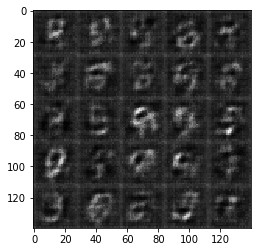

Epoch 1/2... Discriminator Loss: 1.1913... Generator Loss: 1.2319
Epoch 1/2... Discriminator Loss: 1.7912... Generator Loss: 2.2749
Epoch 1/2... Discriminator Loss: 1.3233... Generator Loss: 1.5212
Epoch 1/2... Discriminator Loss: 1.0688... Generator Loss: 0.9586
Epoch 1/2... Discriminator Loss: 2.1221... Generator Loss: 3.0124
Epoch 1/2... Discriminator Loss: 1.0222... Generator Loss: 1.1030
Epoch 1/2... Discriminator Loss: 1.9020... Generator Loss: 0.2859
Epoch 1/2... Discriminator Loss: 1.7462... Generator Loss: 0.3293
Epoch 1/2... Discriminator Loss: 1.1174... Generator Loss: 0.7142
Epoch 1/2... Discriminator Loss: 1.3105... Generator Loss: 0.5968


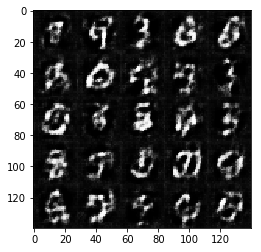

Epoch 1/2... Discriminator Loss: 1.6723... Generator Loss: 2.2724
Epoch 1/2... Discriminator Loss: 0.9826... Generator Loss: 1.0419
Epoch 1/2... Discriminator Loss: 1.0503... Generator Loss: 1.1568
Epoch 1/2... Discriminator Loss: 0.9487... Generator Loss: 1.2795
Epoch 1/2... Discriminator Loss: 1.0425... Generator Loss: 1.3714
Epoch 1/2... Discriminator Loss: 1.0017... Generator Loss: 1.6407
Epoch 1/2... Discriminator Loss: 1.6062... Generator Loss: 2.5987
Epoch 1/2... Discriminator Loss: 0.9371... Generator Loss: 1.6405
Epoch 1/2... Discriminator Loss: 1.0856... Generator Loss: 1.2073
Epoch 1/2... Discriminator Loss: 1.1264... Generator Loss: 0.8307


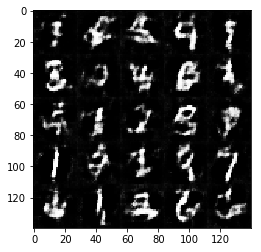

Epoch 1/2... Discriminator Loss: 0.9628... Generator Loss: 1.0694
Epoch 1/2... Discriminator Loss: 0.8989... Generator Loss: 1.3353
Epoch 1/2... Discriminator Loss: 1.1611... Generator Loss: 1.3530
Epoch 1/2... Discriminator Loss: 1.1569... Generator Loss: 1.7958
Epoch 1/2... Discriminator Loss: 1.0104... Generator Loss: 1.8289
Epoch 1/2... Discriminator Loss: 1.0225... Generator Loss: 1.1551
Epoch 1/2... Discriminator Loss: 0.9866... Generator Loss: 0.9965
Epoch 1/2... Discriminator Loss: 0.9030... Generator Loss: 1.4411
Epoch 1/2... Discriminator Loss: 0.8643... Generator Loss: 1.9117
Epoch 1/2... Discriminator Loss: 0.9283... Generator Loss: 1.2151


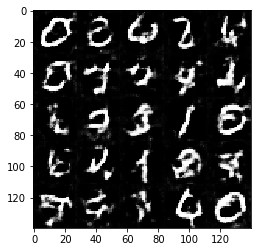

Epoch 1/2... Discriminator Loss: 2.1886... Generator Loss: 3.0411
Epoch 1/2... Discriminator Loss: 0.9379... Generator Loss: 1.8003
Epoch 1/2... Discriminator Loss: 1.2238... Generator Loss: 1.6265
Epoch 1/2... Discriminator Loss: 1.2115... Generator Loss: 0.8231
Epoch 1/2... Discriminator Loss: 0.8903... Generator Loss: 1.3646
Epoch 1/2... Discriminator Loss: 1.0969... Generator Loss: 1.3930
Epoch 1/2... Discriminator Loss: 0.9728... Generator Loss: 0.9490
Epoch 1/2... Discriminator Loss: 2.2493... Generator Loss: 0.2308
Epoch 1/2... Discriminator Loss: 2.4502... Generator Loss: 0.1903
Epoch 1/2... Discriminator Loss: 1.0328... Generator Loss: 0.8746


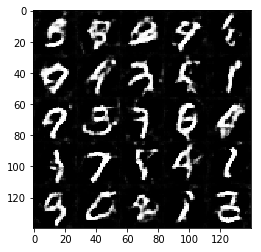

Epoch 1/2... Discriminator Loss: 1.1014... Generator Loss: 1.8288
Epoch 1/2... Discriminator Loss: 1.1430... Generator Loss: 0.9282
Epoch 1/2... Discriminator Loss: 0.9092... Generator Loss: 1.3259
Epoch 1/2... Discriminator Loss: 2.0020... Generator Loss: 0.2731
Epoch 1/2... Discriminator Loss: 1.2352... Generator Loss: 1.8044
Epoch 1/2... Discriminator Loss: 1.5779... Generator Loss: 2.6290
Epoch 1/2... Discriminator Loss: 1.0339... Generator Loss: 1.3809
Epoch 1/2... Discriminator Loss: 0.9972... Generator Loss: 1.0117
Epoch 1/2... Discriminator Loss: 1.0040... Generator Loss: 1.9191
Epoch 1/2... Discriminator Loss: 0.9182... Generator Loss: 1.5581


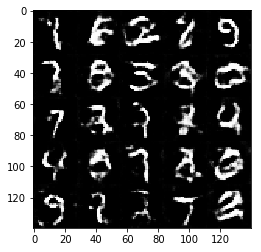

Epoch 1/2... Discriminator Loss: 1.6347... Generator Loss: 0.4003
Epoch 1/2... Discriminator Loss: 1.3537... Generator Loss: 0.5588
Epoch 1/2... Discriminator Loss: 2.3390... Generator Loss: 0.2226
Epoch 1/2... Discriminator Loss: 1.2795... Generator Loss: 0.6491
Epoch 1/2... Discriminator Loss: 0.9864... Generator Loss: 1.1275
Epoch 1/2... Discriminator Loss: 0.8974... Generator Loss: 1.1948
Epoch 1/2... Discriminator Loss: 0.9788... Generator Loss: 1.9068
Epoch 1/2... Discriminator Loss: 0.8954... Generator Loss: 1.4391
Epoch 1/2... Discriminator Loss: 1.1590... Generator Loss: 0.7908
Epoch 1/2... Discriminator Loss: 1.4319... Generator Loss: 0.5325


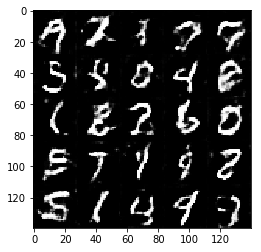

Epoch 1/2... Discriminator Loss: 1.3107... Generator Loss: 0.6424
Epoch 1/2... Discriminator Loss: 1.4520... Generator Loss: 2.7189
Epoch 1/2... Discriminator Loss: 1.2299... Generator Loss: 0.6702
Epoch 1/2... Discriminator Loss: 1.7841... Generator Loss: 0.3359
Epoch 1/2... Discriminator Loss: 0.9060... Generator Loss: 1.4656
Epoch 1/2... Discriminator Loss: 0.7028... Generator Loss: 1.5239
Epoch 1/2... Discriminator Loss: 2.2933... Generator Loss: 2.8275
Epoch 1/2... Discriminator Loss: 0.8939... Generator Loss: 1.0193
Epoch 1/2... Discriminator Loss: 2.0218... Generator Loss: 0.3054
Epoch 1/2... Discriminator Loss: 2.0639... Generator Loss: 0.2670


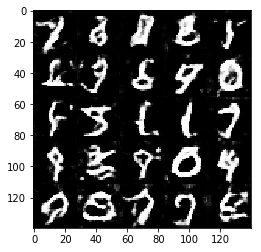

Epoch 1/2... Discriminator Loss: 0.9348... Generator Loss: 0.9971
Epoch 1/2... Discriminator Loss: 1.1136... Generator Loss: 0.7241
Epoch 1/2... Discriminator Loss: 1.1116... Generator Loss: 1.0551
Epoch 1/2... Discriminator Loss: 1.2014... Generator Loss: 0.6330
Epoch 1/2... Discriminator Loss: 1.8886... Generator Loss: 0.3432
Epoch 1/2... Discriminator Loss: 1.6272... Generator Loss: 0.4086
Epoch 1/2... Discriminator Loss: 0.8232... Generator Loss: 1.3609
Epoch 1/2... Discriminator Loss: 0.9036... Generator Loss: 1.2928
Epoch 1/2... Discriminator Loss: 1.1032... Generator Loss: 0.7469
Epoch 1/2... Discriminator Loss: 0.8795... Generator Loss: 1.0668


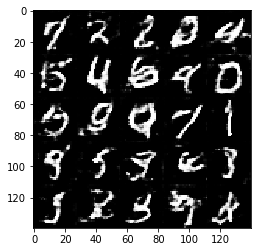

Epoch 1/2... Discriminator Loss: 0.6383... Generator Loss: 2.3986
Epoch 1/2... Discriminator Loss: 1.0617... Generator Loss: 1.9334
Epoch 1/2... Discriminator Loss: 2.4446... Generator Loss: 0.1895
Epoch 1/2... Discriminator Loss: 1.3162... Generator Loss: 0.6205
Epoch 1/2... Discriminator Loss: 1.4262... Generator Loss: 2.7157
Epoch 1/2... Discriminator Loss: 1.0050... Generator Loss: 0.8332
Epoch 1/2... Discriminator Loss: 1.0980... Generator Loss: 0.7632
Epoch 1/2... Discriminator Loss: 3.5434... Generator Loss: 4.7461
Epoch 1/2... Discriminator Loss: 1.0300... Generator Loss: 1.3722
Epoch 1/2... Discriminator Loss: 0.8566... Generator Loss: 1.1934


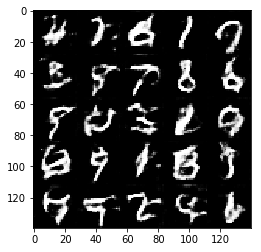

Epoch 1/2... Discriminator Loss: 0.8629... Generator Loss: 1.4065
Epoch 1/2... Discriminator Loss: 2.2149... Generator Loss: 0.2522
Epoch 1/2... Discriminator Loss: 1.2700... Generator Loss: 0.5936
Epoch 1/2... Discriminator Loss: 0.8867... Generator Loss: 1.0750
Epoch 1/2... Discriminator Loss: 1.1878... Generator Loss: 0.6934
Epoch 1/2... Discriminator Loss: 0.8206... Generator Loss: 1.2405
Epoch 1/2... Discriminator Loss: 0.5794... Generator Loss: 1.7354
Epoch 1/2... Discriminator Loss: 0.8399... Generator Loss: 1.1182
Epoch 1/2... Discriminator Loss: 0.8004... Generator Loss: 1.2808
Epoch 1/2... Discriminator Loss: 2.1906... Generator Loss: 3.6423


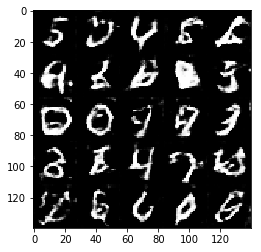

Epoch 1/2... Discriminator Loss: 2.3376... Generator Loss: 0.2128
Epoch 1/2... Discriminator Loss: 0.8868... Generator Loss: 1.7189
Epoch 1/2... Discriminator Loss: 0.6878... Generator Loss: 1.5167
Epoch 1/2... Discriminator Loss: 1.7495... Generator Loss: 0.4224
Epoch 1/2... Discriminator Loss: 1.1714... Generator Loss: 0.8123
Epoch 1/2... Discriminator Loss: 1.1488... Generator Loss: 0.7538
Epoch 1/2... Discriminator Loss: 1.2784... Generator Loss: 0.6969
Epoch 1/2... Discriminator Loss: 0.7081... Generator Loss: 1.7392
Epoch 1/2... Discriminator Loss: 0.6240... Generator Loss: 1.6215
Epoch 1/2... Discriminator Loss: 3.2763... Generator Loss: 0.1262


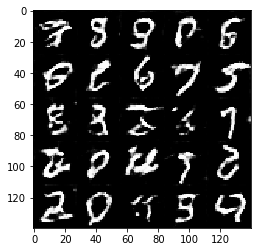

Epoch 1/2... Discriminator Loss: 0.8249... Generator Loss: 1.2244
Epoch 1/2... Discriminator Loss: 1.1540... Generator Loss: 2.5945
Epoch 1/2... Discriminator Loss: 0.9301... Generator Loss: 0.9287
Epoch 1/2... Discriminator Loss: 1.0143... Generator Loss: 0.9011
Epoch 1/2... Discriminator Loss: 2.3813... Generator Loss: 0.2395
Epoch 1/2... Discriminator Loss: 1.2465... Generator Loss: 0.6729
Epoch 1/2... Discriminator Loss: 1.2580... Generator Loss: 0.6014
Epoch 1/2... Discriminator Loss: 0.7386... Generator Loss: 1.3896
Epoch 1/2... Discriminator Loss: 0.7945... Generator Loss: 1.3131
Epoch 1/2... Discriminator Loss: 1.3161... Generator Loss: 0.6019


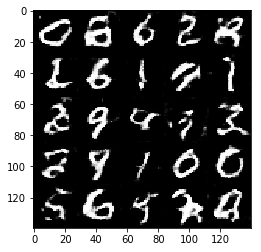

Epoch 1/2... Discriminator Loss: 2.6639... Generator Loss: 0.2456
Epoch 1/2... Discriminator Loss: 1.1229... Generator Loss: 0.7786
Epoch 1/2... Discriminator Loss: 2.1372... Generator Loss: 0.2384
Epoch 1/2... Discriminator Loss: 0.9200... Generator Loss: 1.1340
Epoch 1/2... Discriminator Loss: 0.9923... Generator Loss: 0.8456
Epoch 1/2... Discriminator Loss: 3.0087... Generator Loss: 0.1100
Epoch 1/2... Discriminator Loss: 1.2449... Generator Loss: 0.6831
Epoch 1/2... Discriminator Loss: 0.8104... Generator Loss: 1.1600
Epoch 1/2... Discriminator Loss: 0.7467... Generator Loss: 1.5963
Epoch 1/2... Discriminator Loss: 1.2393... Generator Loss: 0.7583


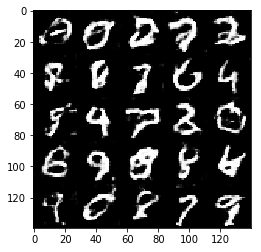

Epoch 1/2... Discriminator Loss: 1.4233... Generator Loss: 0.5436
Epoch 1/2... Discriminator Loss: 1.7970... Generator Loss: 0.3790
Epoch 1/2... Discriminator Loss: 0.7135... Generator Loss: 1.5071
Epoch 1/2... Discriminator Loss: 0.8411... Generator Loss: 1.2336
Epoch 1/2... Discriminator Loss: 0.6620... Generator Loss: 1.4737
Epoch 1/2... Discriminator Loss: 0.7817... Generator Loss: 2.3832
Epoch 1/2... Discriminator Loss: 1.4101... Generator Loss: 0.4913
Epoch 1/2... Discriminator Loss: 0.9220... Generator Loss: 1.1026
Epoch 1/2... Discriminator Loss: 2.7130... Generator Loss: 4.3765
Epoch 1/2... Discriminator Loss: 0.6521... Generator Loss: 1.8255


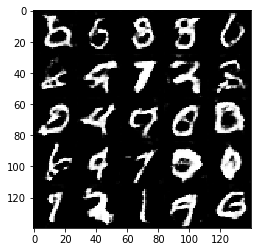

Epoch 1/2... Discriminator Loss: 1.2938... Generator Loss: 0.6518
Epoch 1/2... Discriminator Loss: 1.0793... Generator Loss: 0.8195
Epoch 1/2... Discriminator Loss: 1.8132... Generator Loss: 0.3566
Epoch 1/2... Discriminator Loss: 0.6771... Generator Loss: 2.3877
Epoch 1/2... Discriminator Loss: 0.7938... Generator Loss: 1.5143
Epoch 1/2... Discriminator Loss: 1.7773... Generator Loss: 0.3657
Epoch 1/2... Discriminator Loss: 1.0346... Generator Loss: 2.8902
Epoch 1/2... Discriminator Loss: 0.8351... Generator Loss: 1.7747
Epoch 1/2... Discriminator Loss: 0.8010... Generator Loss: 1.1170
Epoch 1/2... Discriminator Loss: 1.2906... Generator Loss: 0.6741


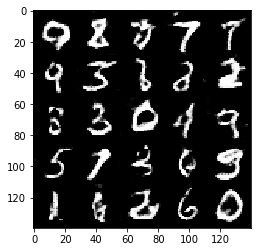

Epoch 1/2... Discriminator Loss: 1.6714... Generator Loss: 0.4513
Epoch 1/2... Discriminator Loss: 0.7251... Generator Loss: 1.4035
Epoch 1/2... Discriminator Loss: 0.8232... Generator Loss: 1.8151
Epoch 1/2... Discriminator Loss: 1.0439... Generator Loss: 0.9002
Epoch 1/2... Discriminator Loss: 0.6391... Generator Loss: 1.6834
Epoch 1/2... Discriminator Loss: 0.6819... Generator Loss: 1.4341
Epoch 1/2... Discriminator Loss: 0.6417... Generator Loss: 1.7334
Epoch 1/2... Discriminator Loss: 0.4988... Generator Loss: 2.2032
Epoch 1/2... Discriminator Loss: 1.0543... Generator Loss: 0.8426
Epoch 1/2... Discriminator Loss: 0.6043... Generator Loss: 1.7116


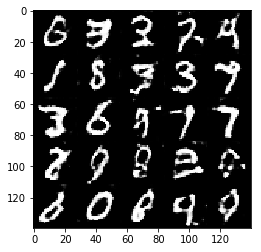

Epoch 1/2... Discriminator Loss: 0.7709... Generator Loss: 1.3464
Epoch 1/2... Discriminator Loss: 2.7421... Generator Loss: 0.2624
Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 2.4284
Epoch 1/2... Discriminator Loss: 0.8784... Generator Loss: 2.0865
Epoch 1/2... Discriminator Loss: 0.7588... Generator Loss: 1.2917
Epoch 1/2... Discriminator Loss: 1.6774... Generator Loss: 0.4687
Epoch 1/2... Discriminator Loss: 1.2379... Generator Loss: 2.8035
Epoch 1/2... Discriminator Loss: 0.7270... Generator Loss: 1.3491
Epoch 1/2... Discriminator Loss: 0.7081... Generator Loss: 1.3247
Epoch 1/2... Discriminator Loss: 0.7195... Generator Loss: 2.7089


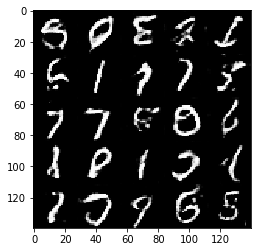

Epoch 1/2... Discriminator Loss: 1.3796... Generator Loss: 2.9730
Epoch 1/2... Discriminator Loss: 0.7581... Generator Loss: 1.4253
Epoch 1/2... Discriminator Loss: 2.1404... Generator Loss: 0.2471
Epoch 1/2... Discriminator Loss: 1.1478... Generator Loss: 0.6906
Epoch 1/2... Discriminator Loss: 0.8032... Generator Loss: 1.1425
Epoch 1/2... Discriminator Loss: 0.8170... Generator Loss: 1.7744
Epoch 1/2... Discriminator Loss: 0.7916... Generator Loss: 1.1979
Epoch 2/2... Discriminator Loss: 0.9192... Generator Loss: 2.4495
Epoch 2/2... Discriminator Loss: 0.7441... Generator Loss: 1.3651
Epoch 2/2... Discriminator Loss: 0.7427... Generator Loss: 1.2611


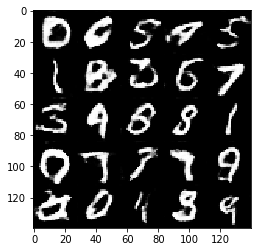

Epoch 2/2... Discriminator Loss: 1.0317... Generator Loss: 1.0228
Epoch 2/2... Discriminator Loss: 1.3431... Generator Loss: 0.6437
Epoch 2/2... Discriminator Loss: 1.1621... Generator Loss: 0.7613
Epoch 2/2... Discriminator Loss: 0.6532... Generator Loss: 1.5184
Epoch 2/2... Discriminator Loss: 1.0460... Generator Loss: 3.2838
Epoch 2/2... Discriminator Loss: 1.6336... Generator Loss: 0.4562
Epoch 2/2... Discriminator Loss: 1.3580... Generator Loss: 0.5803
Epoch 2/2... Discriminator Loss: 0.7169... Generator Loss: 1.9579
Epoch 2/2... Discriminator Loss: 0.7294... Generator Loss: 1.4421
Epoch 2/2... Discriminator Loss: 1.6869... Generator Loss: 3.1327


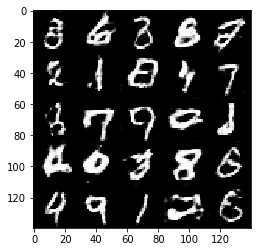

Epoch 2/2... Discriminator Loss: 0.9258... Generator Loss: 1.0257
Epoch 2/2... Discriminator Loss: 0.6745... Generator Loss: 1.4383
Epoch 2/2... Discriminator Loss: 0.7347... Generator Loss: 1.3797
Epoch 2/2... Discriminator Loss: 0.6775... Generator Loss: 1.5256
Epoch 2/2... Discriminator Loss: 0.6740... Generator Loss: 2.0342
Epoch 2/2... Discriminator Loss: 0.4858... Generator Loss: 2.2196
Epoch 2/2... Discriminator Loss: 0.5851... Generator Loss: 2.2301
Epoch 2/2... Discriminator Loss: 0.7802... Generator Loss: 1.2233
Epoch 2/2... Discriminator Loss: 1.0927... Generator Loss: 0.8887
Epoch 2/2... Discriminator Loss: 0.6453... Generator Loss: 1.6597


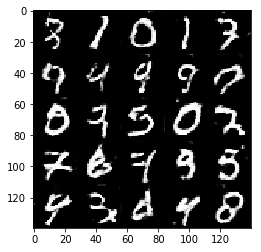

Epoch 2/2... Discriminator Loss: 0.6633... Generator Loss: 2.0483
Epoch 2/2... Discriminator Loss: 0.6367... Generator Loss: 2.0584
Epoch 2/2... Discriminator Loss: 0.5767... Generator Loss: 1.9624
Epoch 2/2... Discriminator Loss: 1.8582... Generator Loss: 0.4335
Epoch 2/2... Discriminator Loss: 0.8225... Generator Loss: 1.5203
Epoch 2/2... Discriminator Loss: 0.6402... Generator Loss: 1.5544
Epoch 2/2... Discriminator Loss: 0.7964... Generator Loss: 1.1997
Epoch 2/2... Discriminator Loss: 0.6552... Generator Loss: 2.1403
Epoch 2/2... Discriminator Loss: 0.8808... Generator Loss: 1.0870
Epoch 2/2... Discriminator Loss: 0.4941... Generator Loss: 2.1724


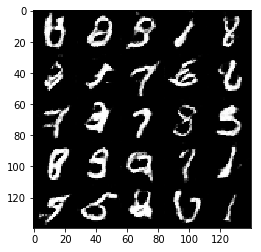

Epoch 2/2... Discriminator Loss: 1.0290... Generator Loss: 2.4763
Epoch 2/2... Discriminator Loss: 0.6569... Generator Loss: 2.0247
Epoch 2/2... Discriminator Loss: 0.6302... Generator Loss: 1.6279
Epoch 2/2... Discriminator Loss: 0.7136... Generator Loss: 1.3705
Epoch 2/2... Discriminator Loss: 0.8626... Generator Loss: 1.1830
Epoch 2/2... Discriminator Loss: 0.5949... Generator Loss: 1.7621
Epoch 2/2... Discriminator Loss: 1.9639... Generator Loss: 0.5221
Epoch 2/2... Discriminator Loss: 0.6195... Generator Loss: 1.7287
Epoch 2/2... Discriminator Loss: 0.7884... Generator Loss: 1.4267
Epoch 2/2... Discriminator Loss: 0.6480... Generator Loss: 2.4856


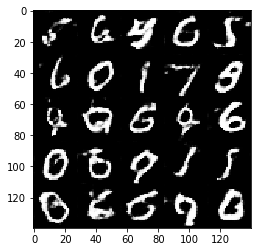

Epoch 2/2... Discriminator Loss: 0.6710... Generator Loss: 2.9369
Epoch 2/2... Discriminator Loss: 0.5667... Generator Loss: 2.2179
Epoch 2/2... Discriminator Loss: 0.8890... Generator Loss: 1.1724
Epoch 2/2... Discriminator Loss: 0.8356... Generator Loss: 1.1349
Epoch 2/2... Discriminator Loss: 0.8606... Generator Loss: 3.7258
Epoch 2/2... Discriminator Loss: 0.9409... Generator Loss: 1.1136
Epoch 2/2... Discriminator Loss: 0.6594... Generator Loss: 1.5674
Epoch 2/2... Discriminator Loss: 0.9500... Generator Loss: 1.0499
Epoch 2/2... Discriminator Loss: 0.6114... Generator Loss: 1.6600
Epoch 2/2... Discriminator Loss: 0.6796... Generator Loss: 1.4448


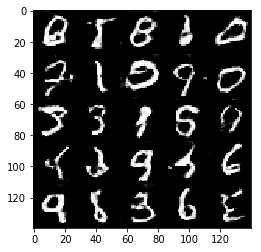

Epoch 2/2... Discriminator Loss: 0.7090... Generator Loss: 2.1936
Epoch 2/2... Discriminator Loss: 0.7248... Generator Loss: 1.3072
Epoch 2/2... Discriminator Loss: 0.6061... Generator Loss: 2.0861
Epoch 2/2... Discriminator Loss: 0.6449... Generator Loss: 1.8453
Epoch 2/2... Discriminator Loss: 1.6782... Generator Loss: 0.5280
Epoch 2/2... Discriminator Loss: 2.0805... Generator Loss: 0.3637
Epoch 2/2... Discriminator Loss: 1.4355... Generator Loss: 0.5516
Epoch 2/2... Discriminator Loss: 0.8520... Generator Loss: 1.2107
Epoch 2/2... Discriminator Loss: 0.8137... Generator Loss: 1.1790
Epoch 2/2... Discriminator Loss: 0.9599... Generator Loss: 0.9741


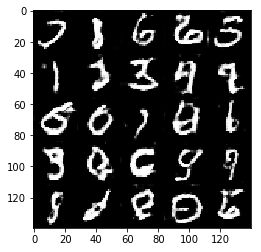

Epoch 2/2... Discriminator Loss: 2.8932... Generator Loss: 0.1865
Epoch 2/2... Discriminator Loss: 0.6931... Generator Loss: 1.4759
Epoch 2/2... Discriminator Loss: 0.9230... Generator Loss: 0.9711
Epoch 2/2... Discriminator Loss: 1.1991... Generator Loss: 3.0254
Epoch 2/2... Discriminator Loss: 1.2468... Generator Loss: 0.6754
Epoch 2/2... Discriminator Loss: 0.8721... Generator Loss: 1.2991
Epoch 2/2... Discriminator Loss: 0.5467... Generator Loss: 1.8913
Epoch 2/2... Discriminator Loss: 0.9031... Generator Loss: 2.5156
Epoch 2/2... Discriminator Loss: 1.1132... Generator Loss: 2.6972
Epoch 2/2... Discriminator Loss: 0.9073... Generator Loss: 1.0899


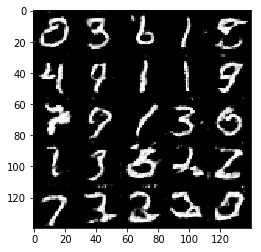

Epoch 2/2... Discriminator Loss: 1.0956... Generator Loss: 0.8303
Epoch 2/2... Discriminator Loss: 0.6178... Generator Loss: 1.6434
Epoch 2/2... Discriminator Loss: 0.7337... Generator Loss: 1.4935
Epoch 2/2... Discriminator Loss: 1.2543... Generator Loss: 0.7007
Epoch 2/2... Discriminator Loss: 0.7004... Generator Loss: 1.5826
Epoch 2/2... Discriminator Loss: 0.7659... Generator Loss: 1.3153
Epoch 2/2... Discriminator Loss: 1.1588... Generator Loss: 0.7619
Epoch 2/2... Discriminator Loss: 0.5419... Generator Loss: 2.1915
Epoch 2/2... Discriminator Loss: 0.5674... Generator Loss: 1.9336
Epoch 2/2... Discriminator Loss: 1.1065... Generator Loss: 0.8977


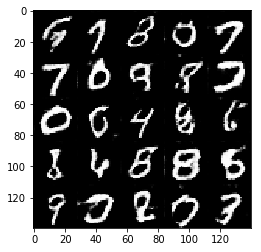

Epoch 2/2... Discriminator Loss: 0.4843... Generator Loss: 2.2737
Epoch 2/2... Discriminator Loss: 1.0848... Generator Loss: 0.8909
Epoch 2/2... Discriminator Loss: 1.8610... Generator Loss: 0.5545
Epoch 2/2... Discriminator Loss: 1.2589... Generator Loss: 0.8625
Epoch 2/2... Discriminator Loss: 0.9421... Generator Loss: 1.0355
Epoch 2/2... Discriminator Loss: 0.9756... Generator Loss: 0.9801
Epoch 2/2... Discriminator Loss: 2.3665... Generator Loss: 0.2713
Epoch 2/2... Discriminator Loss: 1.0232... Generator Loss: 0.8929
Epoch 2/2... Discriminator Loss: 0.9447... Generator Loss: 0.9698
Epoch 2/2... Discriminator Loss: 0.5565... Generator Loss: 2.0769


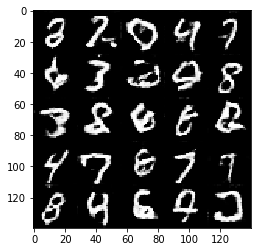

Epoch 2/2... Discriminator Loss: 1.5044... Generator Loss: 3.0809
Epoch 2/2... Discriminator Loss: 1.1399... Generator Loss: 3.4625
Epoch 2/2... Discriminator Loss: 0.6623... Generator Loss: 1.5750
Epoch 2/2... Discriminator Loss: 1.0181... Generator Loss: 0.8609
Epoch 2/2... Discriminator Loss: 1.2333... Generator Loss: 0.7229
Epoch 2/2... Discriminator Loss: 0.9974... Generator Loss: 0.8417
Epoch 2/2... Discriminator Loss: 0.7624... Generator Loss: 1.3079
Epoch 2/2... Discriminator Loss: 0.6544... Generator Loss: 1.6066
Epoch 2/2... Discriminator Loss: 0.6174... Generator Loss: 1.7561
Epoch 2/2... Discriminator Loss: 1.1530... Generator Loss: 3.2929


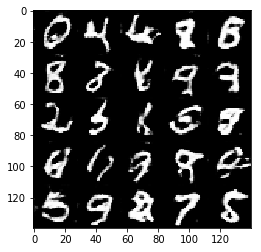

Epoch 2/2... Discriminator Loss: 0.5154... Generator Loss: 2.2161
Epoch 2/2... Discriminator Loss: 0.7498... Generator Loss: 1.3160
Epoch 2/2... Discriminator Loss: 0.6521... Generator Loss: 1.7231
Epoch 2/2... Discriminator Loss: 0.5901... Generator Loss: 1.7285
Epoch 2/2... Discriminator Loss: 0.5971... Generator Loss: 1.8174
Epoch 2/2... Discriminator Loss: 0.5521... Generator Loss: 1.8826
Epoch 2/2... Discriminator Loss: 0.7702... Generator Loss: 1.9707
Epoch 2/2... Discriminator Loss: 0.6086... Generator Loss: 2.1806
Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.5006
Epoch 2/2... Discriminator Loss: 1.0440... Generator Loss: 3.9182


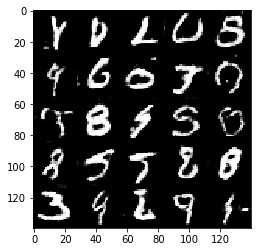

Epoch 2/2... Discriminator Loss: 2.2179... Generator Loss: 4.3480
Epoch 2/2... Discriminator Loss: 0.7267... Generator Loss: 1.5938
Epoch 2/2... Discriminator Loss: 0.9011... Generator Loss: 0.9997
Epoch 2/2... Discriminator Loss: 0.7450... Generator Loss: 1.3563
Epoch 2/2... Discriminator Loss: 1.1622... Generator Loss: 0.7445
Epoch 2/2... Discriminator Loss: 0.8086... Generator Loss: 1.2923
Epoch 2/2... Discriminator Loss: 0.6757... Generator Loss: 1.4874
Epoch 2/2... Discriminator Loss: 0.6321... Generator Loss: 1.6846
Epoch 2/2... Discriminator Loss: 2.3811... Generator Loss: 0.2881
Epoch 2/2... Discriminator Loss: 0.7398... Generator Loss: 1.3602


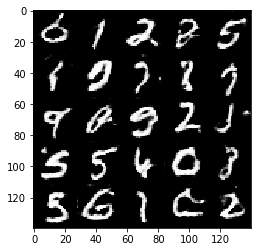

Epoch 2/2... Discriminator Loss: 0.6159... Generator Loss: 2.0819
Epoch 2/2... Discriminator Loss: 0.8013... Generator Loss: 2.6992
Epoch 2/2... Discriminator Loss: 1.0673... Generator Loss: 0.8117
Epoch 2/2... Discriminator Loss: 0.8491... Generator Loss: 1.1951
Epoch 2/2... Discriminator Loss: 1.1641... Generator Loss: 3.0277
Epoch 2/2... Discriminator Loss: 0.6399... Generator Loss: 1.5576
Epoch 2/2... Discriminator Loss: 0.6336... Generator Loss: 1.5858
Epoch 2/2... Discriminator Loss: 0.7110... Generator Loss: 1.6398
Epoch 2/2... Discriminator Loss: 0.7394... Generator Loss: 1.3476
Epoch 2/2... Discriminator Loss: 1.6098... Generator Loss: 0.5958


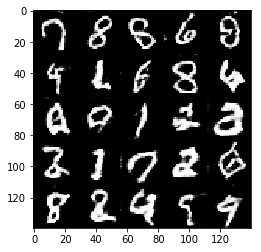

Epoch 2/2... Discriminator Loss: 0.6628... Generator Loss: 1.6257
Epoch 2/2... Discriminator Loss: 0.8685... Generator Loss: 1.1335
Epoch 2/2... Discriminator Loss: 1.2418... Generator Loss: 1.8747
Epoch 2/2... Discriminator Loss: 0.6679... Generator Loss: 1.5806
Epoch 2/2... Discriminator Loss: 0.5660... Generator Loss: 1.9668
Epoch 2/2... Discriminator Loss: 0.7456... Generator Loss: 1.5208
Epoch 2/2... Discriminator Loss: 1.2369... Generator Loss: 0.7471
Epoch 2/2... Discriminator Loss: 1.1276... Generator Loss: 2.8081
Epoch 2/2... Discriminator Loss: 1.2699... Generator Loss: 0.7269
Epoch 2/2... Discriminator Loss: 1.2081... Generator Loss: 0.9827


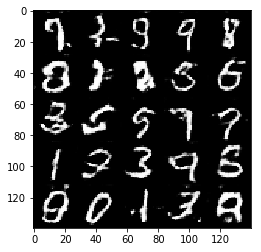

Epoch 2/2... Discriminator Loss: 0.5894... Generator Loss: 1.7382
Epoch 2/2... Discriminator Loss: 0.4515... Generator Loss: 2.5404
Epoch 2/2... Discriminator Loss: 0.5035... Generator Loss: 2.1755
Epoch 2/2... Discriminator Loss: 0.6874... Generator Loss: 2.3850
Epoch 2/2... Discriminator Loss: 0.7126... Generator Loss: 1.4813
Epoch 2/2... Discriminator Loss: 0.4411... Generator Loss: 2.8571
Epoch 2/2... Discriminator Loss: 1.6790... Generator Loss: 0.7103
Epoch 2/2... Discriminator Loss: 1.2638... Generator Loss: 0.6995
Epoch 2/2... Discriminator Loss: 0.4703... Generator Loss: 2.4521
Epoch 2/2... Discriminator Loss: 1.0114... Generator Loss: 1.0178


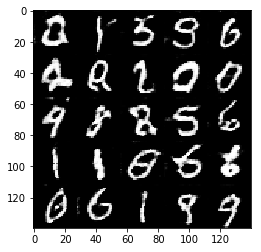

Epoch 2/2... Discriminator Loss: 1.0631... Generator Loss: 0.9596
Epoch 2/2... Discriminator Loss: 0.8895... Generator Loss: 1.0290
Epoch 2/2... Discriminator Loss: 0.6039... Generator Loss: 2.0431
Epoch 2/2... Discriminator Loss: 0.4410... Generator Loss: 2.5068
Epoch 2/2... Discriminator Loss: 1.0984... Generator Loss: 0.8877
Epoch 2/2... Discriminator Loss: 1.1306... Generator Loss: 2.8146
Epoch 2/2... Discriminator Loss: 0.6184... Generator Loss: 2.4205
Epoch 2/2... Discriminator Loss: 0.7966... Generator Loss: 1.3025
Epoch 2/2... Discriminator Loss: 2.5943... Generator Loss: 4.3778
Epoch 2/2... Discriminator Loss: 0.6555... Generator Loss: 1.7011


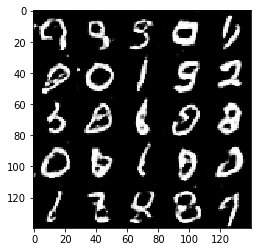

Epoch 2/2... Discriminator Loss: 0.9289... Generator Loss: 0.9823
Epoch 2/2... Discriminator Loss: 0.8600... Generator Loss: 1.1219
Epoch 2/2... Discriminator Loss: 0.5855... Generator Loss: 1.7732
Epoch 2/2... Discriminator Loss: 0.5831... Generator Loss: 1.9294
Epoch 2/2... Discriminator Loss: 0.6501... Generator Loss: 1.7903
Epoch 2/2... Discriminator Loss: 0.9841... Generator Loss: 1.0505
Epoch 2/2... Discriminator Loss: 1.6494... Generator Loss: 0.5329
Epoch 2/2... Discriminator Loss: 0.7613... Generator Loss: 1.5034
Epoch 2/2... Discriminator Loss: 2.2046... Generator Loss: 0.5185
Epoch 2/2... Discriminator Loss: 0.6632... Generator Loss: 1.5610


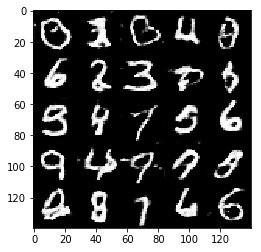

Epoch 2/2... Discriminator Loss: 0.5260... Generator Loss: 2.2412
Epoch 2/2... Discriminator Loss: 0.6174... Generator Loss: 2.0834
Epoch 2/2... Discriminator Loss: 1.1037... Generator Loss: 0.7175
Epoch 2/2... Discriminator Loss: 2.0497... Generator Loss: 0.3616
Epoch 2/2... Discriminator Loss: 0.6534... Generator Loss: 2.3173
Epoch 2/2... Discriminator Loss: 0.9439... Generator Loss: 1.1771
Epoch 2/2... Discriminator Loss: 0.5491... Generator Loss: 1.9649
Epoch 2/2... Discriminator Loss: 0.7408... Generator Loss: 1.3611
Epoch 2/2... Discriminator Loss: 0.6965... Generator Loss: 1.6715
Epoch 2/2... Discriminator Loss: 0.6208... Generator Loss: 2.6536


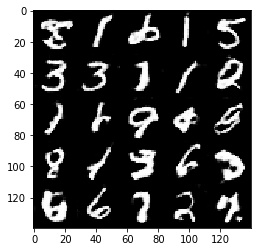

Epoch 2/2... Discriminator Loss: 1.2888... Generator Loss: 4.5617
Epoch 2/2... Discriminator Loss: 0.9728... Generator Loss: 0.9750
Epoch 2/2... Discriminator Loss: 0.6562... Generator Loss: 1.5216
Epoch 2/2... Discriminator Loss: 1.0492... Generator Loss: 0.8833
Epoch 2/2... Discriminator Loss: 0.6538... Generator Loss: 1.8126


In [59]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.1869... Generator Loss: 0.4774
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 4.9092
Epoch 1/1... Discriminator Loss: 1.5361... Generator Loss: 0.4933
Epoch 1/1... Discriminator Loss: 1.7289... Generator Loss: 0.3887
Epoch 1/1... Discriminator Loss: 0.9485... Generator Loss: 1.7337
Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 3.2318
Epoch 1/1... Discriminator Loss: 0.6646... Generator Loss: 2.9307
Epoch 1/1... Discriminator Loss: 1.0910... Generator Loss: 1.5512
Epoch 1/1... Discriminator Loss: 1.6576... Generator Loss: 3.0214
Epoch 1/1... Discriminator Loss: 1.0653... Generator Loss: 0.9495


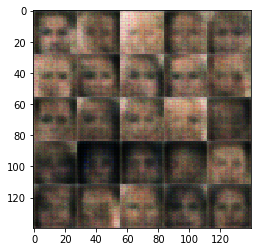

Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.5162
Epoch 1/1... Discriminator Loss: 1.0637... Generator Loss: 0.8798
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 0.6006
Epoch 1/1... Discriminator Loss: 2.9174... Generator Loss: 0.1124
Epoch 1/1... Discriminator Loss: 1.2203... Generator Loss: 0.5892
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.5950
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.9650
Epoch 1/1... Discriminator Loss: 2.3960... Generator Loss: 0.1599
Epoch 1/1... Discriminator Loss: 1.8870... Generator Loss: 0.2713
Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.9700


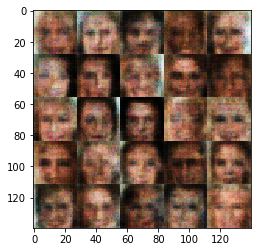

Epoch 1/1... Discriminator Loss: 1.0906... Generator Loss: 0.9092
Epoch 1/1... Discriminator Loss: 1.5635... Generator Loss: 1.4965
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.9100
Epoch 1/1... Discriminator Loss: 1.4370... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.7335
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 1.5546
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 1.4107
Epoch 1/1... Discriminator Loss: 2.2743... Generator Loss: 0.1731
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.8849


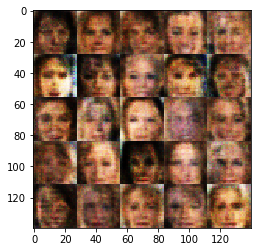

Epoch 1/1... Discriminator Loss: 1.4132... Generator Loss: 0.9053
Epoch 1/1... Discriminator Loss: 1.9007... Generator Loss: 0.2535
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 0.9238
Epoch 1/1... Discriminator Loss: 1.0787... Generator Loss: 0.8438
Epoch 1/1... Discriminator Loss: 1.4327... Generator Loss: 0.6090
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.7181
Epoch 1/1... Discriminator Loss: 1.4632... Generator Loss: 0.6738
Epoch 1/1... Discriminator Loss: 1.2294... Generator Loss: 0.8442
Epoch 1/1... Discriminator Loss: 1.4251... Generator Loss: 0.7974
Epoch 1/1... Discriminator Loss: 1.1702... Generator Loss: 1.0772


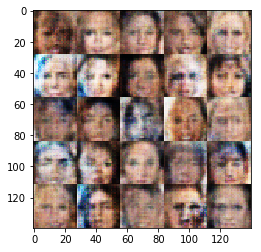

Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 1.5936... Generator Loss: 0.3572
Epoch 1/1... Discriminator Loss: 0.6837... Generator Loss: 1.4909
Epoch 1/1... Discriminator Loss: 1.4291... Generator Loss: 0.9030
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.7618
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.5674
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.7525
Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 1.8113
Epoch 1/1... Discriminator Loss: 0.9466... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 1.6777


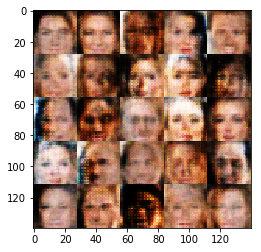

Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 0.8593
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.3668... Generator Loss: 0.6867
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 1.0302
Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 1.0036
Epoch 1/1... Discriminator Loss: 1.2076... Generator Loss: 0.5838
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.6496
Epoch 1/1... Discriminator Loss: 1.2778... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.6143
Epoch 1/1... Discriminator Loss: 0.8248... Generator Loss: 1.3012


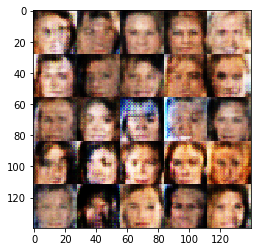

Epoch 1/1... Discriminator Loss: 3.4049... Generator Loss: 3.2166
Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.8963
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.7710
Epoch 1/1... Discriminator Loss: 1.0358... Generator Loss: 0.8415
Epoch 1/1... Discriminator Loss: 1.4805... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.2553... Generator Loss: 1.8701
Epoch 1/1... Discriminator Loss: 0.8178... Generator Loss: 1.0048
Epoch 1/1... Discriminator Loss: 1.7487... Generator Loss: 0.4028
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 0.8514
Epoch 1/1... Discriminator Loss: 1.1942... Generator Loss: 0.8579


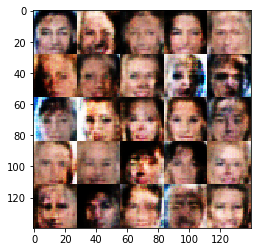

Epoch 1/1... Discriminator Loss: 1.5059... Generator Loss: 0.4547
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.7426
Epoch 1/1... Discriminator Loss: 2.6511... Generator Loss: 0.1234
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.8687
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 1.0135
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.8019
Epoch 1/1... Discriminator Loss: 1.2816... Generator Loss: 0.9951
Epoch 1/1... Discriminator Loss: 1.3505... Generator Loss: 1.2928
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 0.8616... Generator Loss: 0.9765


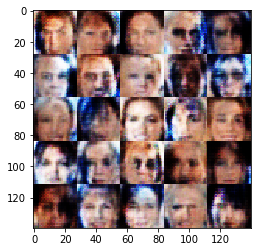

Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 1.0069
Epoch 1/1... Discriminator Loss: 1.3054... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.2110... Generator Loss: 0.6909
Epoch 1/1... Discriminator Loss: 1.5591... Generator Loss: 0.4841
Epoch 1/1... Discriminator Loss: 1.6790... Generator Loss: 2.4540
Epoch 1/1... Discriminator Loss: 0.7655... Generator Loss: 1.6318
Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.9666
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.5618
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.8993
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 1.1341


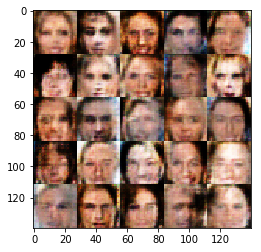

Epoch 1/1... Discriminator Loss: 0.9726... Generator Loss: 0.9903
Epoch 1/1... Discriminator Loss: 2.0163... Generator Loss: 0.2390
Epoch 1/1... Discriminator Loss: 1.1972... Generator Loss: 0.7314
Epoch 1/1... Discriminator Loss: 0.9156... Generator Loss: 0.9788
Epoch 1/1... Discriminator Loss: 2.0088... Generator Loss: 2.4839
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.8548
Epoch 1/1... Discriminator Loss: 1.2447... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 1.3239... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.2213... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.9150


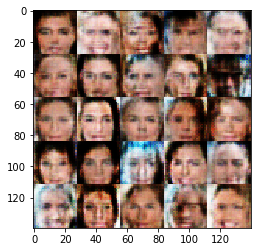

Epoch 1/1... Discriminator Loss: 1.4574... Generator Loss: 2.2348
Epoch 1/1... Discriminator Loss: 0.8975... Generator Loss: 0.9197
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.9635
Epoch 1/1... Discriminator Loss: 1.2268... Generator Loss: 0.8793
Epoch 1/1... Discriminator Loss: 1.4904... Generator Loss: 0.6073
Epoch 1/1... Discriminator Loss: 1.5572... Generator Loss: 0.4578
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 2.0943
Epoch 1/1... Discriminator Loss: 1.1435... Generator Loss: 0.6301
Epoch 1/1... Discriminator Loss: 1.4340... Generator Loss: 1.4576
Epoch 1/1... Discriminator Loss: 2.0920... Generator Loss: 2.1379


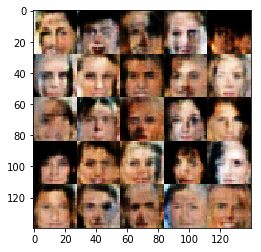

Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 0.5868
Epoch 1/1... Discriminator Loss: 1.4984... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.5634... Generator Loss: 0.7216
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.8296
Epoch 1/1... Discriminator Loss: 1.0455... Generator Loss: 0.8563
Epoch 1/1... Discriminator Loss: 1.8032... Generator Loss: 0.3283
Epoch 1/1... Discriminator Loss: 1.2387... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.5058
Epoch 1/1... Discriminator Loss: 1.0748... Generator Loss: 1.1082


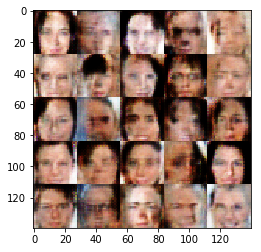

Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.7457
Epoch 1/1... Discriminator Loss: 1.2576... Generator Loss: 0.9936
Epoch 1/1... Discriminator Loss: 1.1990... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.9492... Generator Loss: 0.3317
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.1820... Generator Loss: 0.9939
Epoch 1/1... Discriminator Loss: 1.1705... Generator Loss: 0.9937
Epoch 1/1... Discriminator Loss: 1.0892... Generator Loss: 1.6128
Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 0.7968


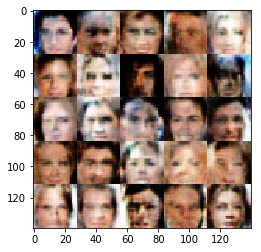

Epoch 1/1... Discriminator Loss: 1.2716... Generator Loss: 0.8312
Epoch 1/1... Discriminator Loss: 2.5830... Generator Loss: 0.1360
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 1.5301
Epoch 1/1... Discriminator Loss: 1.1174... Generator Loss: 0.7128
Epoch 1/1... Discriminator Loss: 1.2636... Generator Loss: 1.2765
Epoch 1/1... Discriminator Loss: 1.4531... Generator Loss: 0.5785
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 0.7764... Generator Loss: 1.2013
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.6973
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 0.6248


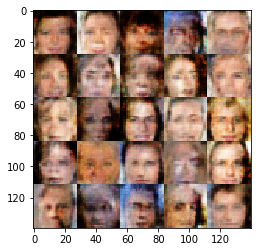

Epoch 1/1... Discriminator Loss: 1.1889... Generator Loss: 1.1658
Epoch 1/1... Discriminator Loss: 1.2631... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.7529... Generator Loss: 2.5700
Epoch 1/1... Discriminator Loss: 1.1028... Generator Loss: 0.7719
Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 1.0900... Generator Loss: 0.7285
Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 1.7362
Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.6115
Epoch 1/1... Discriminator Loss: 1.1256... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.2188... Generator Loss: 1.0477


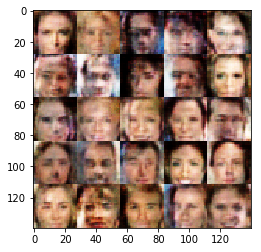

Epoch 1/1... Discriminator Loss: 1.0229... Generator Loss: 0.8361
Epoch 1/1... Discriminator Loss: 1.8712... Generator Loss: 0.2953
Epoch 1/1... Discriminator Loss: 1.5173... Generator Loss: 0.4660
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 1.2851
Epoch 1/1... Discriminator Loss: 1.3819... Generator Loss: 0.4995
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.5892
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.8132
Epoch 1/1... Discriminator Loss: 1.5535... Generator Loss: 0.3856
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.4651
Epoch 1/1... Discriminator Loss: 1.5139... Generator Loss: 0.4038


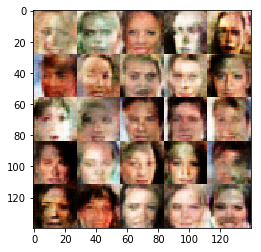

Epoch 1/1... Discriminator Loss: 1.1140... Generator Loss: 0.9076
Epoch 1/1... Discriminator Loss: 0.9914... Generator Loss: 0.9804
Epoch 1/1... Discriminator Loss: 1.0715... Generator Loss: 0.7525
Epoch 1/1... Discriminator Loss: 0.9172... Generator Loss: 1.4088
Epoch 1/1... Discriminator Loss: 1.2639... Generator Loss: 0.9307
Epoch 1/1... Discriminator Loss: 1.1795... Generator Loss: 1.3520
Epoch 1/1... Discriminator Loss: 1.3755... Generator Loss: 0.6528
Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.1866... Generator Loss: 0.9044
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.6903


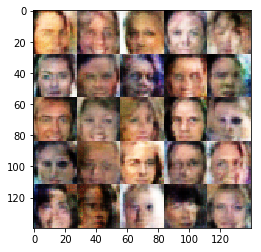

Epoch 1/1... Discriminator Loss: 1.1575... Generator Loss: 0.8449
Epoch 1/1... Discriminator Loss: 1.2255... Generator Loss: 0.9980
Epoch 1/1... Discriminator Loss: 1.1997... Generator Loss: 0.8172
Epoch 1/1... Discriminator Loss: 1.1577... Generator Loss: 1.0716
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 0.8952
Epoch 1/1... Discriminator Loss: 1.2009... Generator Loss: 0.6673
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 1.2514
Epoch 1/1... Discriminator Loss: 1.0730... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.8112... Generator Loss: 0.3086
Epoch 1/1... Discriminator Loss: 1.2953... Generator Loss: 1.5882


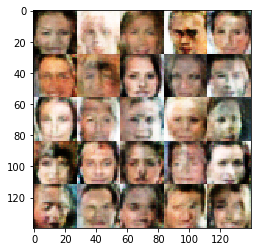

Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 0.6489
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.4818
Epoch 1/1... Discriminator Loss: 2.6418... Generator Loss: 0.1203
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.1647... Generator Loss: 0.8890
Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 0.8323
Epoch 1/1... Discriminator Loss: 1.5739... Generator Loss: 1.4990
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 0.6999
Epoch 1/1... Discriminator Loss: 1.1397... Generator Loss: 1.1687
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 1.2361


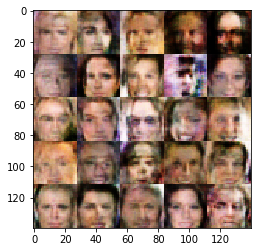

Epoch 1/1... Discriminator Loss: 1.0241... Generator Loss: 1.0699
Epoch 1/1... Discriminator Loss: 1.8431... Generator Loss: 0.3155
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 1.0102
Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 1.2149
Epoch 1/1... Discriminator Loss: 1.5919... Generator Loss: 0.4060
Epoch 1/1... Discriminator Loss: 1.1096... Generator Loss: 1.1164
Epoch 1/1... Discriminator Loss: 1.0411... Generator Loss: 1.0992
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.9191
Epoch 1/1... Discriminator Loss: 1.2614... Generator Loss: 0.8280
Epoch 1/1... Discriminator Loss: 1.0714... Generator Loss: 1.1943


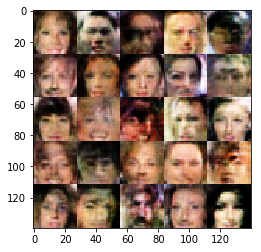

Epoch 1/1... Discriminator Loss: 2.0596... Generator Loss: 2.4403
Epoch 1/1... Discriminator Loss: 1.1155... Generator Loss: 0.9446
Epoch 1/1... Discriminator Loss: 2.0255... Generator Loss: 0.2281
Epoch 1/1... Discriminator Loss: 1.0113... Generator Loss: 0.9323
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.9844
Epoch 1/1... Discriminator Loss: 1.2026... Generator Loss: 0.6860
Epoch 1/1... Discriminator Loss: 1.3433... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.2209... Generator Loss: 0.5991
Epoch 1/1... Discriminator Loss: 2.1029... Generator Loss: 0.2048


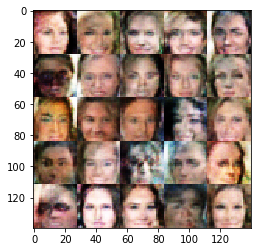

Epoch 1/1... Discriminator Loss: 1.2154... Generator Loss: 0.9668
Epoch 1/1... Discriminator Loss: 1.6496... Generator Loss: 0.3790
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 1.2546
Epoch 1/1... Discriminator Loss: 1.2065... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.4509... Generator Loss: 0.9979
Epoch 1/1... Discriminator Loss: 1.8966... Generator Loss: 0.2751
Epoch 1/1... Discriminator Loss: 1.6076... Generator Loss: 0.3629
Epoch 1/1... Discriminator Loss: 2.3592... Generator Loss: 0.1548
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.7316


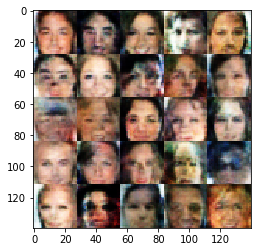

Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.9242
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 1.3213
Epoch 1/1... Discriminator Loss: 1.3283... Generator Loss: 0.5189
Epoch 1/1... Discriminator Loss: 1.3903... Generator Loss: 0.5921
Epoch 1/1... Discriminator Loss: 1.2532... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 0.5646
Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.8310
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 1.1487
Epoch 1/1... Discriminator Loss: 1.2841... Generator Loss: 0.5754
Epoch 1/1... Discriminator Loss: 1.0491... Generator Loss: 1.2134


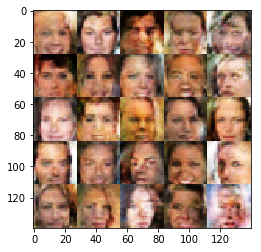

Epoch 1/1... Discriminator Loss: 1.1304... Generator Loss: 1.3126
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 1.0587
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 1.2800... Generator Loss: 1.3916
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.5446
Epoch 1/1... Discriminator Loss: 1.1541... Generator Loss: 0.9076
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.7099
Epoch 1/1... Discriminator Loss: 1.1938... Generator Loss: 1.1232
Epoch 1/1... Discriminator Loss: 1.0663... Generator Loss: 1.0721
Epoch 1/1... Discriminator Loss: 1.4834... Generator Loss: 1.5384


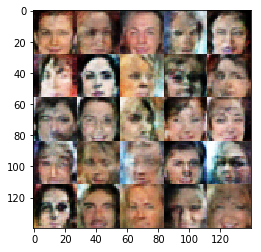

Epoch 1/1... Discriminator Loss: 1.6320... Generator Loss: 0.4033
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.5409
Epoch 1/1... Discriminator Loss: 1.9714... Generator Loss: 0.2601
Epoch 1/1... Discriminator Loss: 1.3445... Generator Loss: 0.5767
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 0.8535
Epoch 1/1... Discriminator Loss: 1.6635... Generator Loss: 2.1708
Epoch 1/1... Discriminator Loss: 1.5106... Generator Loss: 1.8026
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.5634
Epoch 1/1... Discriminator Loss: 1.5938... Generator Loss: 0.3826
Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 0.7661


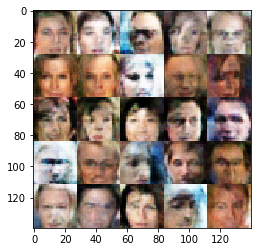

Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 1.6679... Generator Loss: 0.3655
Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.7198... Generator Loss: 0.3244
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.5082
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 0.9114
Epoch 1/1... Discriminator Loss: 1.1432... Generator Loss: 0.8239
Epoch 1/1... Discriminator Loss: 1.5431... Generator Loss: 0.4728
Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 0.7637


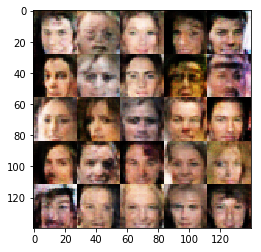

Epoch 1/1... Discriminator Loss: 1.2589... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.4461... Generator Loss: 0.4347
Epoch 1/1... Discriminator Loss: 1.7539... Generator Loss: 2.1586
Epoch 1/1... Discriminator Loss: 1.1249... Generator Loss: 0.9707
Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 0.8304
Epoch 1/1... Discriminator Loss: 0.9756... Generator Loss: 0.9663
Epoch 1/1... Discriminator Loss: 1.2103... Generator Loss: 1.0946
Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 1.5444
Epoch 1/1... Discriminator Loss: 1.1763... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 1.2366... Generator Loss: 1.7830


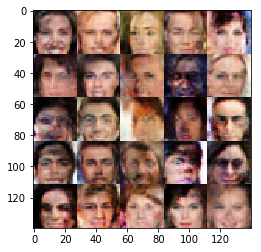

Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 0.6004
Epoch 1/1... Discriminator Loss: 1.1032... Generator Loss: 1.0554
Epoch 1/1... Discriminator Loss: 1.4198... Generator Loss: 0.5246
Epoch 1/1... Discriminator Loss: 1.5884... Generator Loss: 0.4017
Epoch 1/1... Discriminator Loss: 1.3911... Generator Loss: 0.5480
Epoch 1/1... Discriminator Loss: 1.7765... Generator Loss: 0.2912
Epoch 1/1... Discriminator Loss: 1.2407... Generator Loss: 1.1645
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 0.7504
Epoch 1/1... Discriminator Loss: 2.0274... Generator Loss: 0.2354
Epoch 1/1... Discriminator Loss: 1.1503... Generator Loss: 0.7787


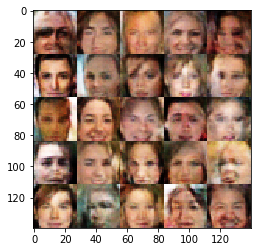

Epoch 1/1... Discriminator Loss: 1.4286... Generator Loss: 0.4777
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.5263
Epoch 1/1... Discriminator Loss: 1.2851... Generator Loss: 0.8366
Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 0.8421
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.9267
Epoch 1/1... Discriminator Loss: 1.1515... Generator Loss: 0.9502
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.5063
Epoch 1/1... Discriminator Loss: 1.2156... Generator Loss: 1.2261
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 1.0181
Epoch 1/1... Discriminator Loss: 1.6943... Generator Loss: 0.3350


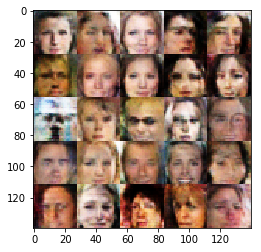

Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.5217
Epoch 1/1... Discriminator Loss: 1.0826... Generator Loss: 0.8306
Epoch 1/1... Discriminator Loss: 1.0734... Generator Loss: 1.1738
Epoch 1/1... Discriminator Loss: 1.2453... Generator Loss: 1.2617
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.4466... Generator Loss: 0.4748
Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 0.7479
Epoch 1/1... Discriminator Loss: 1.1204... Generator Loss: 1.4113
Epoch 1/1... Discriminator Loss: 1.6828... Generator Loss: 0.3663
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 0.9534


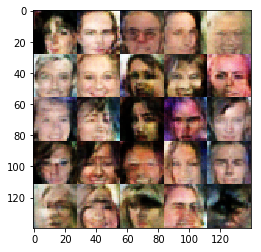

Epoch 1/1... Discriminator Loss: 1.8512... Generator Loss: 0.2740
Epoch 1/1... Discriminator Loss: 1.6001... Generator Loss: 0.3699
Epoch 1/1... Discriminator Loss: 1.4339... Generator Loss: 0.4590
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 1.3197
Epoch 1/1... Discriminator Loss: 1.1639... Generator Loss: 0.7771
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.5328
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 1.2150
Epoch 1/1... Discriminator Loss: 0.7700... Generator Loss: 1.1887
Epoch 1/1... Discriminator Loss: 1.8231... Generator Loss: 0.3003
Epoch 1/1... Discriminator Loss: 1.5398... Generator Loss: 0.4091


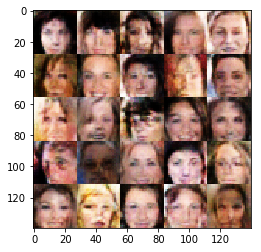

Epoch 1/1... Discriminator Loss: 1.0712... Generator Loss: 0.8398
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 1.1856... Generator Loss: 0.7961
Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 1.7252
Epoch 1/1... Discriminator Loss: 1.4275... Generator Loss: 0.4582
Epoch 1/1... Discriminator Loss: 0.9912... Generator Loss: 1.2890
Epoch 1/1... Discriminator Loss: 1.6789... Generator Loss: 0.3323
Epoch 1/1... Discriminator Loss: 1.7989... Generator Loss: 0.3300
Epoch 1/1... Discriminator Loss: 1.3434... Generator Loss: 0.5834
Epoch 1/1... Discriminator Loss: 1.4299... Generator Loss: 0.7688


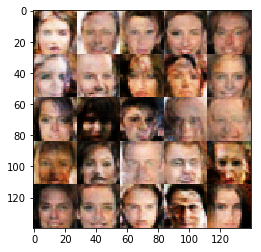

Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.5441
Epoch 1/1... Discriminator Loss: 1.0184... Generator Loss: 1.2161
Epoch 1/1... Discriminator Loss: 1.7936... Generator Loss: 0.3306
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 1.4693
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 0.9264
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 1.2115
Epoch 1/1... Discriminator Loss: 1.5172... Generator Loss: 1.3734
Epoch 1/1... Discriminator Loss: 1.4718... Generator Loss: 0.5213
Epoch 1/1... Discriminator Loss: 1.5668... Generator Loss: 0.3943
Epoch 1/1... Discriminator Loss: 1.1063... Generator Loss: 0.8919


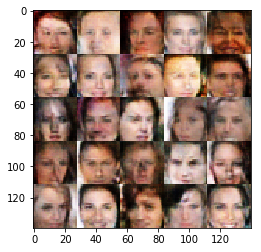

Epoch 1/1... Discriminator Loss: 0.9506... Generator Loss: 1.2705
Epoch 1/1... Discriminator Loss: 1.2863... Generator Loss: 0.5831
Epoch 1/1... Discriminator Loss: 1.1194... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.5687... Generator Loss: 0.3928
Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 0.6517
Epoch 1/1... Discriminator Loss: 1.6503... Generator Loss: 2.0504
Epoch 1/1... Discriminator Loss: 1.6647... Generator Loss: 0.3488
Epoch 1/1... Discriminator Loss: 1.2394... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.8655... Generator Loss: 1.8799
Epoch 1/1... Discriminator Loss: 1.5504... Generator Loss: 0.3873


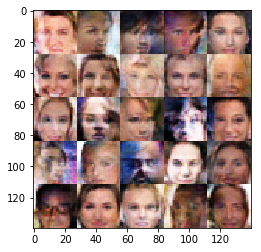

Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.3340... Generator Loss: 1.5948
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 0.8507
Epoch 1/1... Discriminator Loss: 1.5128... Generator Loss: 0.4268
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.8075
Epoch 1/1... Discriminator Loss: 1.1945... Generator Loss: 0.6721
Epoch 1/1... Discriminator Loss: 1.2002... Generator Loss: 1.1059
Epoch 1/1... Discriminator Loss: 1.0228... Generator Loss: 0.9388
Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.6919... Generator Loss: 0.3184


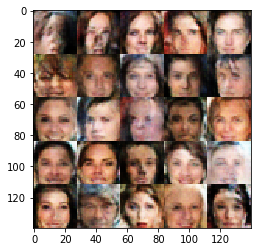

Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.7493
Epoch 1/1... Discriminator Loss: 1.1879... Generator Loss: 0.8619
Epoch 1/1... Discriminator Loss: 1.6874... Generator Loss: 0.3415
Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.8849
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 0.8663... Generator Loss: 1.2533
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 0.8015
Epoch 1/1... Discriminator Loss: 1.4449... Generator Loss: 0.4867
Epoch 1/1... Discriminator Loss: 1.2732... Generator Loss: 0.8362
Epoch 1/1... Discriminator Loss: 1.1978... Generator Loss: 0.6316


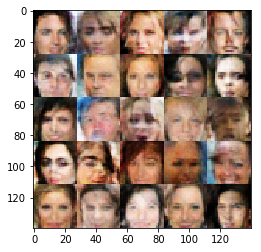

Epoch 1/1... Discriminator Loss: 1.6780... Generator Loss: 0.3471
Epoch 1/1... Discriminator Loss: 2.1961... Generator Loss: 0.1907
Epoch 1/1... Discriminator Loss: 1.5028... Generator Loss: 0.4702
Epoch 1/1... Discriminator Loss: 1.6121... Generator Loss: 0.3663
Epoch 1/1... Discriminator Loss: 1.0974... Generator Loss: 1.2378
Epoch 1/1... Discriminator Loss: 1.6521... Generator Loss: 0.3495
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.6585
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.5244
Epoch 1/1... Discriminator Loss: 2.1894... Generator Loss: 0.1916
Epoch 1/1... Discriminator Loss: 1.4597... Generator Loss: 0.6709


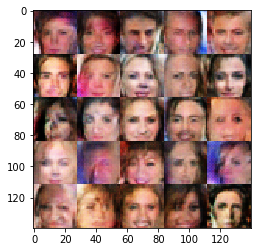

Epoch 1/1... Discriminator Loss: 1.5420... Generator Loss: 0.4456
Epoch 1/1... Discriminator Loss: 1.7586... Generator Loss: 0.3403
Epoch 1/1... Discriminator Loss: 1.1371... Generator Loss: 0.7111
Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 0.9035
Epoch 1/1... Discriminator Loss: 1.6096... Generator Loss: 0.3723
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 1.2693
Epoch 1/1... Discriminator Loss: 1.7058... Generator Loss: 0.3227
Epoch 1/1... Discriminator Loss: 1.4675... Generator Loss: 0.4316
Epoch 1/1... Discriminator Loss: 1.3456... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.3841... Generator Loss: 1.4885


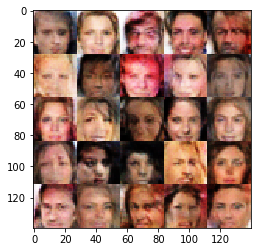

Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 1.2116... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.9819... Generator Loss: 2.2644
Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 0.8110
Epoch 1/1... Discriminator Loss: 1.0829... Generator Loss: 1.1566
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.7101
Epoch 1/1... Discriminator Loss: 1.2850... Generator Loss: 0.6131
Epoch 1/1... Discriminator Loss: 1.7881... Generator Loss: 0.3044
Epoch 1/1... Discriminator Loss: 1.0916... Generator Loss: 0.9416
Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 1.0601


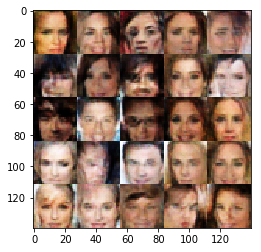

Epoch 1/1... Discriminator Loss: 1.2997... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.7977... Generator Loss: 0.2934
Epoch 1/1... Discriminator Loss: 1.5975... Generator Loss: 0.3907
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 1.0811
Epoch 1/1... Discriminator Loss: 1.6728... Generator Loss: 0.3713
Epoch 1/1... Discriminator Loss: 1.5273... Generator Loss: 0.4367
Epoch 1/1... Discriminator Loss: 1.7431... Generator Loss: 0.3240
Epoch 1/1... Discriminator Loss: 1.5294... Generator Loss: 0.4346
Epoch 1/1... Discriminator Loss: 1.2251... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.3491


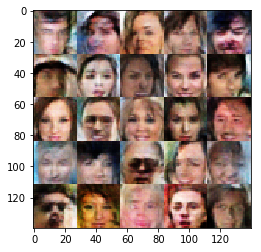

Epoch 1/1... Discriminator Loss: 1.8530... Generator Loss: 0.2889
Epoch 1/1... Discriminator Loss: 1.4720... Generator Loss: 0.4471
Epoch 1/1... Discriminator Loss: 1.5409... Generator Loss: 0.3954
Epoch 1/1... Discriminator Loss: 1.4693... Generator Loss: 0.4102
Epoch 1/1... Discriminator Loss: 1.5042... Generator Loss: 0.4005
Epoch 1/1... Discriminator Loss: 1.5637... Generator Loss: 0.3828
Epoch 1/1... Discriminator Loss: 1.1702... Generator Loss: 0.9595
Epoch 1/1... Discriminator Loss: 1.0015... Generator Loss: 0.9221
Epoch 1/1... Discriminator Loss: 1.1202... Generator Loss: 1.2308
Epoch 1/1... Discriminator Loss: 1.4714... Generator Loss: 0.4276


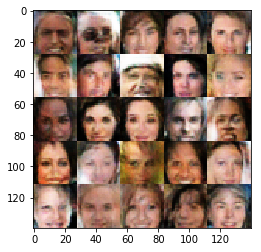

Epoch 1/1... Discriminator Loss: 1.0238... Generator Loss: 0.8278
Epoch 1/1... Discriminator Loss: 1.8132... Generator Loss: 0.3252
Epoch 1/1... Discriminator Loss: 1.1496... Generator Loss: 0.7825
Epoch 1/1... Discriminator Loss: 1.2702... Generator Loss: 1.6396
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.5246
Epoch 1/1... Discriminator Loss: 1.7436... Generator Loss: 0.3125
Epoch 1/1... Discriminator Loss: 1.4501... Generator Loss: 0.4668
Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 0.5471
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 1.1039
Epoch 1/1... Discriminator Loss: 1.0822... Generator Loss: 0.9591


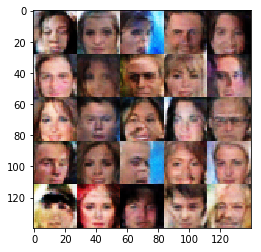

Epoch 1/1... Discriminator Loss: 0.9660... Generator Loss: 0.9673
Epoch 1/1... Discriminator Loss: 1.4911... Generator Loss: 1.3830
Epoch 1/1... Discriminator Loss: 1.1864... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.2313... Generator Loss: 0.9070
Epoch 1/1... Discriminator Loss: 1.0393... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 1.3681... Generator Loss: 0.4933
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.6266
Epoch 1/1... Discriminator Loss: 1.2683... Generator Loss: 0.5774
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.8407
Epoch 1/1... Discriminator Loss: 1.9467... Generator Loss: 0.2440


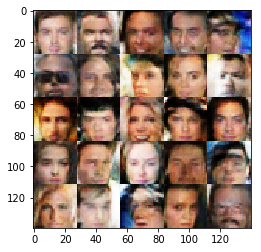

Epoch 1/1... Discriminator Loss: 1.5244... Generator Loss: 0.4330
Epoch 1/1... Discriminator Loss: 1.8338... Generator Loss: 0.2777
Epoch 1/1... Discriminator Loss: 1.1747... Generator Loss: 0.7372
Epoch 1/1... Discriminator Loss: 1.1699... Generator Loss: 0.7416
Epoch 1/1... Discriminator Loss: 1.0853... Generator Loss: 1.0051
Epoch 1/1... Discriminator Loss: 1.6130... Generator Loss: 0.3662
Epoch 1/1... Discriminator Loss: 1.4847... Generator Loss: 1.2345
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 1.0947
Epoch 1/1... Discriminator Loss: 1.8930... Generator Loss: 0.2901
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 1.3234


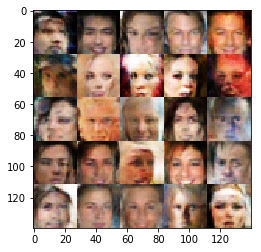

Epoch 1/1... Discriminator Loss: 1.4515... Generator Loss: 0.4664
Epoch 1/1... Discriminator Loss: 1.0528... Generator Loss: 1.4007
Epoch 1/1... Discriminator Loss: 1.4600... Generator Loss: 0.4549
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 0.6270
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 1.1737
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 0.5535
Epoch 1/1... Discriminator Loss: 0.7304... Generator Loss: 1.2362
Epoch 1/1... Discriminator Loss: 1.5575... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.5843


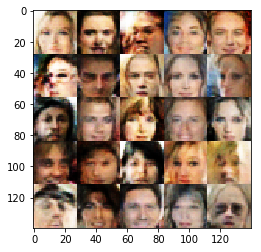

Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.5154
Epoch 1/1... Discriminator Loss: 1.6766... Generator Loss: 0.3551
Epoch 1/1... Discriminator Loss: 1.2211... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.4306... Generator Loss: 0.4888
Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 1.1833
Epoch 1/1... Discriminator Loss: 1.6577... Generator Loss: 0.3498
Epoch 1/1... Discriminator Loss: 1.2405... Generator Loss: 0.5816
Epoch 1/1... Discriminator Loss: 2.6291... Generator Loss: 0.1320
Epoch 1/1... Discriminator Loss: 1.1565... Generator Loss: 0.7563
Epoch 1/1... Discriminator Loss: 1.6105... Generator Loss: 0.3912


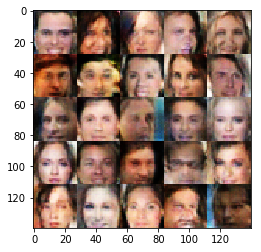

Epoch 1/1... Discriminator Loss: 1.2294... Generator Loss: 0.6157
Epoch 1/1... Discriminator Loss: 1.5978... Generator Loss: 0.4041
Epoch 1/1... Discriminator Loss: 1.0993... Generator Loss: 0.9809
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.4536
Epoch 1/1... Discriminator Loss: 1.8184... Generator Loss: 0.2751
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.5440
Epoch 1/1... Discriminator Loss: 0.7997... Generator Loss: 1.1995
Epoch 1/1... Discriminator Loss: 2.1953... Generator Loss: 0.1845
Epoch 1/1... Discriminator Loss: 1.7514... Generator Loss: 0.3557
Epoch 1/1... Discriminator Loss: 1.1439... Generator Loss: 0.6816


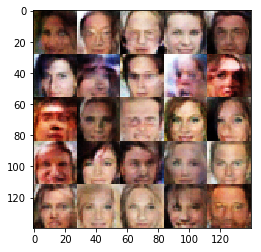

Epoch 1/1... Discriminator Loss: 0.8992... Generator Loss: 1.0759
Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 1.6545
Epoch 1/1... Discriminator Loss: 1.0523... Generator Loss: 0.8799
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.4923
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.5436
Epoch 1/1... Discriminator Loss: 1.1687... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.5297
Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 0.5732
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.5150
Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.5289


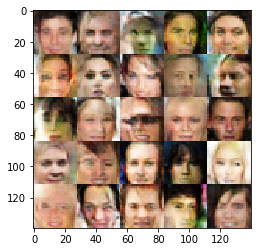

Epoch 1/1... Discriminator Loss: 1.9412... Generator Loss: 0.2491
Epoch 1/1... Discriminator Loss: 1.4518... Generator Loss: 0.4489
Epoch 1/1... Discriminator Loss: 1.5143... Generator Loss: 0.4154
Epoch 1/1... Discriminator Loss: 1.0906... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.3487... Generator Loss: 0.5057
Epoch 1/1... Discriminator Loss: 1.7883... Generator Loss: 0.3210
Epoch 1/1... Discriminator Loss: 0.9964... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 1.3193
Epoch 1/1... Discriminator Loss: 1.0657... Generator Loss: 0.8395
Epoch 1/1... Discriminator Loss: 1.3364... Generator Loss: 0.5387


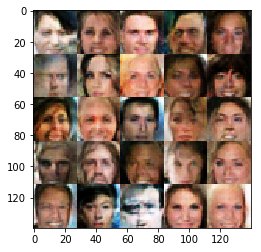

Epoch 1/1... Discriminator Loss: 1.1393... Generator Loss: 1.1942
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.9714
Epoch 1/1... Discriminator Loss: 1.7492... Generator Loss: 0.3247
Epoch 1/1... Discriminator Loss: 1.7330... Generator Loss: 0.3090
Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 0.7669
Epoch 1/1... Discriminator Loss: 1.4098... Generator Loss: 0.7571
Epoch 1/1... Discriminator Loss: 1.2222... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 1.9391... Generator Loss: 0.2658
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 1.0714
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.5348


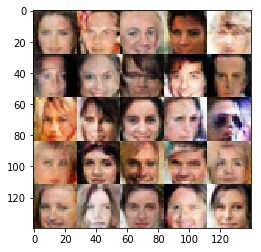

Epoch 1/1... Discriminator Loss: 1.4174... Generator Loss: 0.4802
Epoch 1/1... Discriminator Loss: 2.4119... Generator Loss: 0.1460
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.5897
Epoch 1/1... Discriminator Loss: 0.6602... Generator Loss: 1.7493
Epoch 1/1... Discriminator Loss: 1.4235... Generator Loss: 0.4706
Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 0.8133
Epoch 1/1... Discriminator Loss: 2.1441... Generator Loss: 0.2406
Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 0.6807


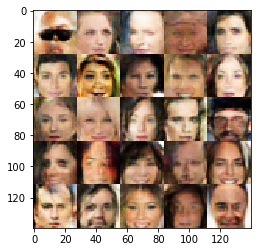

Epoch 1/1... Discriminator Loss: 1.5873... Generator Loss: 0.3888
Epoch 1/1... Discriminator Loss: 1.1097... Generator Loss: 0.8424
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 1.1738
Epoch 1/1... Discriminator Loss: 1.6714... Generator Loss: 0.3582
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.5264
Epoch 1/1... Discriminator Loss: 1.0842... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.3038... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.0275... Generator Loss: 1.3131
Epoch 1/1... Discriminator Loss: 0.6586... Generator Loss: 2.2734
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.6074


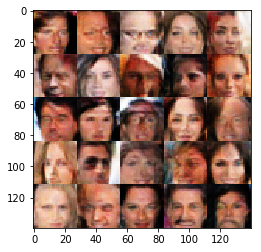

Epoch 1/1... Discriminator Loss: 1.4430... Generator Loss: 0.4473
Epoch 1/1... Discriminator Loss: 1.0909... Generator Loss: 0.7647
Epoch 1/1... Discriminator Loss: 1.8988... Generator Loss: 0.2526
Epoch 1/1... Discriminator Loss: 1.7001... Generator Loss: 0.3152
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 0.7315
Epoch 1/1... Discriminator Loss: 1.9523... Generator Loss: 0.2484
Epoch 1/1... Discriminator Loss: 0.8950... Generator Loss: 1.1496
Epoch 1/1... Discriminator Loss: 1.0235... Generator Loss: 0.9587
Epoch 1/1... Discriminator Loss: 0.8048... Generator Loss: 1.3745
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 1.0212


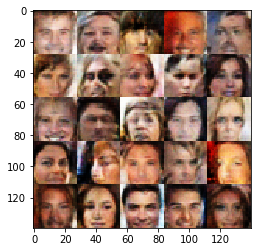

Epoch 1/1... Discriminator Loss: 1.9052... Generator Loss: 0.2687
Epoch 1/1... Discriminator Loss: 1.2695... Generator Loss: 0.5683
Epoch 1/1... Discriminator Loss: 1.4700... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.1743... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 1.4175
Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 0.7774
Epoch 1/1... Discriminator Loss: 1.0082... Generator Loss: 0.9497
Epoch 1/1... Discriminator Loss: 1.6972... Generator Loss: 0.3432
Epoch 1/1... Discriminator Loss: 1.2772... Generator Loss: 0.6485
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.5468


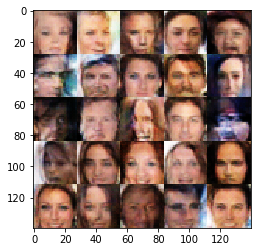

Epoch 1/1... Discriminator Loss: 1.0713... Generator Loss: 1.0230
Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.6206
Epoch 1/1... Discriminator Loss: 1.4485... Generator Loss: 0.4564
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.4808
Epoch 1/1... Discriminator Loss: 1.0335... Generator Loss: 1.4309
Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.5528
Epoch 1/1... Discriminator Loss: 1.8610... Generator Loss: 0.2907
Epoch 1/1... Discriminator Loss: 1.7163... Generator Loss: 0.3184
Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 1.4784


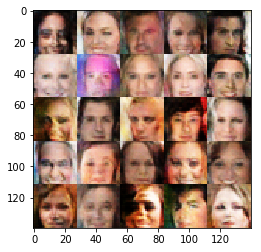

Epoch 1/1... Discriminator Loss: 1.7575... Generator Loss: 0.3407
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 1.3193
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 1.2684... Generator Loss: 0.5799
Epoch 1/1... Discriminator Loss: 1.4889... Generator Loss: 0.4168
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.0778... Generator Loss: 1.1447
Epoch 1/1... Discriminator Loss: 1.0830... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 1.2285... Generator Loss: 1.1842
Epoch 1/1... Discriminator Loss: 1.7060... Generator Loss: 0.3659


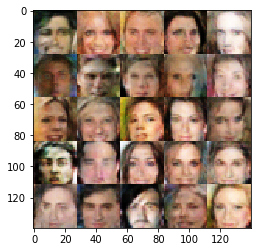

Epoch 1/1... Discriminator Loss: 1.0379... Generator Loss: 0.7822
Epoch 1/1... Discriminator Loss: 1.2454... Generator Loss: 0.6288
Epoch 1/1... Discriminator Loss: 1.1783... Generator Loss: 0.9731
Epoch 1/1... Discriminator Loss: 1.5294... Generator Loss: 0.4124
Epoch 1/1... Discriminator Loss: 1.2022... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 1.0085... Generator Loss: 0.8333
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 1.1454
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.6069
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 0.6977
Epoch 1/1... Discriminator Loss: 1.4086... Generator Loss: 2.5451


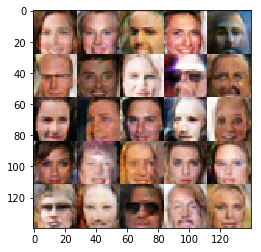

Epoch 1/1... Discriminator Loss: 2.1698... Generator Loss: 0.2095
Epoch 1/1... Discriminator Loss: 1.1830... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 2.0516... Generator Loss: 0.2254
Epoch 1/1... Discriminator Loss: 2.0541... Generator Loss: 0.2720
Epoch 1/1... Discriminator Loss: 1.7707... Generator Loss: 0.4086
Epoch 1/1... Discriminator Loss: 0.7412... Generator Loss: 1.2174
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 1.2571
Epoch 1/1... Discriminator Loss: 1.1344... Generator Loss: 1.0119
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.4560
Epoch 1/1... Discriminator Loss: 1.4636... Generator Loss: 0.4529


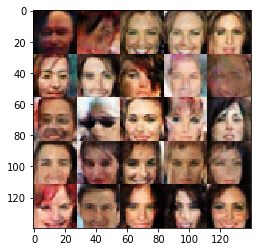

Epoch 1/1... Discriminator Loss: 0.9461... Generator Loss: 1.1858
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 0.9672
Epoch 1/1... Discriminator Loss: 1.8284... Generator Loss: 0.3017
Epoch 1/1... Discriminator Loss: 1.4698... Generator Loss: 0.4615
Epoch 1/1... Discriminator Loss: 1.1947... Generator Loss: 0.7403
Epoch 1/1... Discriminator Loss: 1.1952... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 1.1649... Generator Loss: 0.7374
Epoch 1/1... Discriminator Loss: 1.6305... Generator Loss: 0.3872
Epoch 1/1... Discriminator Loss: 1.5582... Generator Loss: 2.3676
Epoch 1/1... Discriminator Loss: 1.0226... Generator Loss: 0.9059


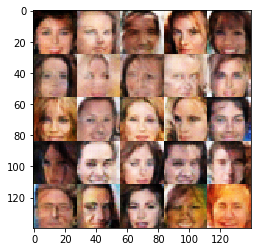

Epoch 1/1... Discriminator Loss: 0.9569... Generator Loss: 1.2944
Epoch 1/1... Discriminator Loss: 1.0761... Generator Loss: 1.1519
Epoch 1/1... Discriminator Loss: 1.0167... Generator Loss: 1.0044
Epoch 1/1... Discriminator Loss: 1.4551... Generator Loss: 0.4538
Epoch 1/1... Discriminator Loss: 1.1396... Generator Loss: 1.0725
Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 1.9021
Epoch 1/1... Discriminator Loss: 1.7467... Generator Loss: 0.3313
Epoch 1/1... Discriminator Loss: 2.0024... Generator Loss: 0.2670
Epoch 1/1... Discriminator Loss: 0.7738... Generator Loss: 1.1901
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.7521


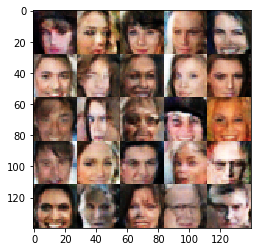

Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.5602
Epoch 1/1... Discriminator Loss: 1.4423... Generator Loss: 0.4604
Epoch 1/1... Discriminator Loss: 1.1633... Generator Loss: 0.8385
Epoch 1/1... Discriminator Loss: 1.1584... Generator Loss: 1.4159
Epoch 1/1... Discriminator Loss: 1.5460... Generator Loss: 0.4537
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 0.9064... Generator Loss: 0.9657
Epoch 1/1... Discriminator Loss: 0.9163... Generator Loss: 0.9079
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.5680
Epoch 1/1... Discriminator Loss: 1.7845... Generator Loss: 0.2945


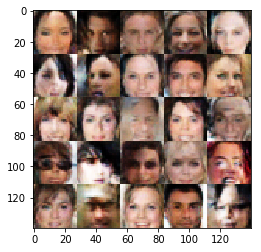

Epoch 1/1... Discriminator Loss: 1.4595... Generator Loss: 0.4346
Epoch 1/1... Discriminator Loss: 1.1603... Generator Loss: 1.0855
Epoch 1/1... Discriminator Loss: 1.1704... Generator Loss: 1.3035
Epoch 1/1... Discriminator Loss: 1.6815... Generator Loss: 0.3204
Epoch 1/1... Discriminator Loss: 0.9521... Generator Loss: 1.5953
Epoch 1/1... Discriminator Loss: 1.5407... Generator Loss: 0.4032
Epoch 1/1... Discriminator Loss: 1.1232... Generator Loss: 0.9361
Epoch 1/1... Discriminator Loss: 1.0015... Generator Loss: 0.9269
Epoch 1/1... Discriminator Loss: 1.3713... Generator Loss: 0.5127
Epoch 1/1... Discriminator Loss: 1.9795... Generator Loss: 0.2871


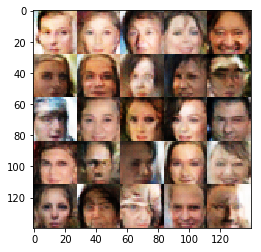

Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.5324
Epoch 1/1... Discriminator Loss: 1.5358... Generator Loss: 1.0199
Epoch 1/1... Discriminator Loss: 1.7692... Generator Loss: 0.3248
Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 0.7101
Epoch 1/1... Discriminator Loss: 1.8616... Generator Loss: 2.2971
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.5550
Epoch 1/1... Discriminator Loss: 1.3919... Generator Loss: 0.4713
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 0.6488
Epoch 1/1... Discriminator Loss: 2.4016... Generator Loss: 0.1683
Epoch 1/1... Discriminator Loss: 1.4179... Generator Loss: 0.4986


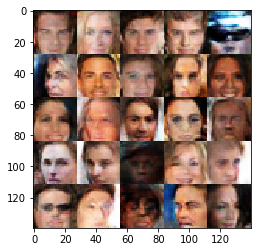

Epoch 1/1... Discriminator Loss: 0.9188... Generator Loss: 1.2851
Epoch 1/1... Discriminator Loss: 1.6145... Generator Loss: 0.3525
Epoch 1/1... Discriminator Loss: 1.4820... Generator Loss: 0.4481


In [60]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.